# The Finite difference method

The finite difference method divides the line into a mesh and solves equations only for specific locations (nodes) in the mesh. A mesh is created with $t = (0, \Delta t, 2\Delta t, \ldots, N \Delta t)$, where $t_n=n \Delta t$ and $T=t_N = N \Delta t$.

![tikz](Screenshot.png)

Up until now we have solved equations by using a recursive approach. This is very easy to implement intuitively using for-loops. However, the most common and general use of finite difference methods is through explicit assembling of matrices.

Consider the decay model first

$$ u' + au = 0, u(0)=I, t \in [0, T] $$

We create a solution vector $\boldsymbol{u} = (u^0, u^1, \ldots, u^{N_t})$

To solve recursively, we start by setting $u^0=I$, and then recursively solve

$$ \frac{u^{n+1}-u^n}{\Delta t} = -a (\theta u^{n+1} + (1-\theta) u^n) $$

Rearranged

$$ u^{n+1} = \frac{1 - (1-\theta) a \Delta t}{1 + \theta a \Delta t} u^n $$

Recursive algorithm:

* $u^0 = I$
* for  n = 0, 1, ... , N-1
    * Compute $u^{n+1} = \frac{1 - (1-\theta) a \Delta t}{1 + \theta a \Delta t} u^n$


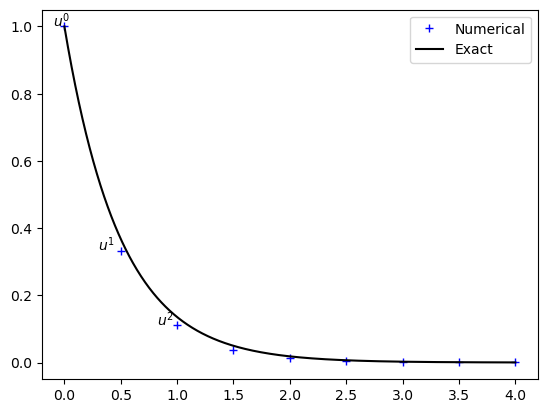

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)
N = 8
a = 2
I = 1
theta = 0.5
dt = 0.5
T = N*dt
t = np.linspace(0, N*dt, N+1)
u = np.zeros(N+1)
C = (1 - (1-theta) * a * dt)/(1 + theta * a * dt)
u[0] = I
for n in range(N):
    u[n+1] = C * u[n]
te = np.linspace(0, N*dt, 1001)
plt.plot(t, u, 'b+', te, np.exp(-a*te), 'k')
plt.legend(['Numerical', 'Exact'])
plt.text(-0.1, u[0], '$u^0$')
plt.text(0.3, u[1], '$u^1$')
plt.text(0.82, u[2], '$u^2$');

# Matrix approach

The recursive approach never assembles the $N+1$ linear equations, it just steps forward, solving $u^{n+1}$ from $u^n$. The matrix approach is simply an approach where all the linear equations are set up first as a matrix problem. The matrix formulation for the generic decay problem is

$$
A \boldsymbol{u} = \boldsymbol{b}
$$

where $\boldsymbol{u} \in \mathbb{R}^{N+1}$, $\boldsymbol{b} \in \mathbb{R}^{N+1}$ and  the matrix $A \in \mathbb{R}^{(N+1) \times (N+1)}$ is 

$$
A = \begin{bmatrix} 
 1  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 -C  & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0  & -C & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0  & 0 & -C & 1 & 0 & 0 & 0 & 0 & 0  \\
 0  & 0 & 0 & -C & 1 & 0 & 0 & 0 & 0  \\
 0  & 0 & 0 & 0 & -C & 1 & 0 & 0 & 0  \\
 0  & 0 & 0 & 0 & 0 & -C & 1 & 0 & 0  \\
 0  & 0 & 0 & 0 & 0 & 0 & -C & 1 & 0  \\
 0  & 0 & 0 & 0 & 0 & 0 & 0 & -C & 1  
\end{bmatrix}
$$

We have a linear algebra problem

$$
A \boldsymbol{u} = \boldsymbol{b}
$$

which is trivially solved by Gaussian elimination or simply a forward elimination. 

$$
\boldsymbol{u} = A^{-1} \boldsymbol{b}
$$

The system to solve looks like

$$
 \underbrace{
 \begin{bmatrix} 
 1  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 -C  & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0  & -C & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0  & 0 & -C & 1 & 0 & 0 & 0 & 0 & 0  \\
 0  & 0 & 0 & -C & 1 & 0 & 0 & 0 & 0  \\
 0  & 0 & 0 & 0 & -C & 1 & 0 & 0 & 0  \\
 0  & 0 & 0 & 0 & 0 & -C & 1 & 0 & 0  \\
 0  & 0 & 0 & 0 & 0 & 0 & -C & 1 & 0  \\
 0  & 0 & 0 & 0 & 0 & 0 & 0 & -C & 1  
\end{bmatrix}}_{A}
\underbrace{\begin{bmatrix}
u^0 \\
u^1 \\
u^2 \\
u^3 \\
u^4 \\
u^5 \\
u^6 \\
u^7 \\
u^8 \\
u^9
\end{bmatrix}}_{\boldsymbol{u}} = 
\underbrace{\begin{bmatrix}
I \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 
\end{bmatrix}}_{\boldsymbol{b}}
$$

Notice the boundary condition in row 0. The remaining $N$ rows (equations) use the same stencil.

We can assemble the matrix $A$ using the [scipy.sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) package

In [2]:
from scipy import sparse
A = sparse.diags([np.full(N, -C), np.ones(N+1)], np.array([-1, 0]), (N+1, N+1), 'csr')
A.toarray()

array([[ 1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [-0.333,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   , -0.333,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   , -0.333,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   , -0.333,  1.   ,  0.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   , -0.333,  1.   ,  0.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.333,  1.   ,  0.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.333,  1.   ,
         0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.333,
         1.   ]])

In [3]:
b = np.zeros(N+1)
b[0] = I
un = sparse.linalg.spsolve_triangular(A, b, lower=True, unit_diagonal=True)
un

array([1.000e+00, 3.333e-01, 1.111e-01, 3.704e-02, 1.235e-02, 4.115e-03,
       1.372e-03, 4.572e-04, 1.524e-04])

The solution is the same as before:

In [4]:
un-u

array([0., 0., 0., 0., 0., 0., 0., 0., 0.])

## The vibration problem

$$
u'' + \omega^2 u = 0, \quad u(0) = I, u'(0) = 0, t \in [0, T]
$$

is solved using a central difference for $n=1, 2, \ldots, N-1$

$$
\frac{u^{n+1}-2u^n+u^{n-1}}{\Delta t^2} + \omega^2 u^n = 0
$$

The recursive algorithm is

* $u^0 = I$
* $u^1 = u^0(1 - 0.5 \omega^2 \Delta t^2)$
* for n = 1, 2, ... , N-1
    * $u^{n+1} = (2-\omega^2 \Delta t^2 ) u^n - u^{n-1}$
 
The algebraic problem 

$$ A \boldsymbol{u} = \boldsymbol{b} $$

is now, using $C = 2-\omega^2 \Delta t^2$,

$$
\begin{bmatrix} 
 1  & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 -{C}/{2} & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\
 1  & -C & 1 & 0 & 0 & 0 & 0 & 0 & 0  \\
 0  & 1 & -C & 1 & 0 & 0 & 0 & 0 & 0  \\
 0  & 0 & 1 & -C & 1 & 0 & 0 & 0 & 0  \\
 0  & 0 & 0 & 1 & -C & 1 & 0 & 0 & 0  \\
 0  & 0 & 0 & 0 & 1 & -C & 1 & 0 & 0  \\
 0  & 0 & 0 & 0 & 0 & 1 & -C & 1 & 0  \\
 0  & 0 & 0 & 0 & 0 & 0 & 1 & -C & 1  
\end{bmatrix}
\begin{bmatrix}
u^0 \\
u^1 \\
u^2 \\
u^3 \\
u^4 \\
u^5 \\
u^6 \\
u^7 \\
u^8 \\
u^9
\end{bmatrix}
=
\begin{bmatrix}
I \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$

<div class="alert alert-block alert-info">
Notice that the matrix is lower triangular. Matrices that are lower or upper triangular are especially quick to solve for using forward or backward substitution.
</div>

<div class="alert alert-block alert-success">
The matrices are here lower triangular because the 2 boundary conditions are specified at one end of the domain. The scheme is explicit, the unknown $u^{n+1}$ is not used in computing the source term.
</div>

# Finite differentiation matrices

We will now use Taylor expansions more orderly to obtain differentiation matrices. To this end we use the following expansions, three which are forward, and one backward:

$$
\begin{align}
(-1)\quad u^{n-1} &= u^n - h u' + \frac{h^2}{2}u'' - \frac{h^3}{6}u''' + \frac{h^4}{24}u'''' - \cdots \\
(1)\quad u^{n+1} &= u^n + h u' + \frac{h^2}{2}u'' + \frac{h^3}{6}u''' + \frac{h^4}{24}u'''' + \cdots \\
(2)\quad u^{n+2} &= u^n + 2h u' + \frac{2 h^2}{1}u'' + \frac{4 h^3}{3}u''' + \frac{2 h^4}{3}u'''' + \cdots \\
(3)\quad u^{n+3} &= u^n + 3h u' + \frac{9 h^2}{2}u'' + \frac{9 h^3}{2}u''' + \frac{27 h^4}{8}u'''' + \cdots \\
\end{align}
$$

Remember, $u^{n+a} = u(t_{n+a})$ and $t_{n+a} = (n+a)h$ and we use $h=\Delta t$ for simplicity.

Consider now the central second order finite difference operator $u''(t_n)$. We can obtain an expression for this by adding equations (-1) and (1)

$$
\begin{equation}
u''(t_n) = \frac{u^{n+1}-2u^n + u^{n-1}}{h^2}  + \frac{h^2}{12}u'''' + 
\end{equation}
$$

The operation can be set up for all $n$ as a matrix-vector product

$$
\boldsymbol{u}^{(2)} = D^{(2)} \boldsymbol{u}
$$

where we use $\boldsymbol{u}^{(2)}=\{u''(t_n)\}_{n=0}^{N_t}$ to represent the finite difference approximation to the second derivative at the $N_t+1$ mesh points. The finite difference differentiation matrix is

$$
D^{(2)} = \frac{1}{h^2} \begin{bmatrix}
? & ? & ? & ?  & ? & ? & ? & ?  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
? & ? & ? & ?  & ? & ? & ? & ? \\
\end{bmatrix}
$$

where the first and last rows are open because the stencil in row 0 requires $u^{-1}$ and for the row $N$ it requires $u^{N+1}$. For these two rows we need to use a different stencil.

A first order accurate expression for $u''$ can be obtained by 2 times Eq. (1) for Eq. (2), i.e., $(2)-2(1)$:

$$
(2)-2(1): \, u^{n+2} - 2u^{n+1} = -u^n + \frac{h^2}{1}u'' + h^3 u''' + \frac{7 h^4}{12}u'''' +
$$

Isolate $u''$ to obtain

$$
u'' = \frac{u^{n+2}-2u^{n+1}+u^n}{h^2} - h u''' - \frac{7 h^2}{12}u'''' + 
$$

The error is first order as the first error term is $-h u'''$. 

Can we do better? Yes, of course, just add one more point to the finite difference stencil using Eq. (3). Now to eliminate both $u'$ and $u'''$ terms add the three equations as $-(3) + 4(2) - 5(1)$ (don't worry about how I know this yet)

$$
-(3)+4(2)-5(1): \, -u^{n+3}+4u^{n+2}-5u^{n+1} = -2 u^n + h^2 u'' - \frac{11 h^4}{12}u'''' +   
$$

which leads to the second order accurate

$$
u'' = \frac{-u^{n+1} + 4u^{n+2} - 5u^{n+1} + 2u^n}{h^2} + \frac{11 h^2}{12} u'''' +
$$

We can now modify our differentiation matrix $D^{(2)}$ using this one sided (forward) difference for row 0. For the last row, we can derive the same expression, only using points backward in time:

$$
D^{(2)} = \frac{1}{h^2}\begin{bmatrix}
2 & -5 & 4 & -1  & 0 & 0 & 0 & 0  \\
1 & -2 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & 1 & -2 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  1& -2& 1& 0 \\
\vdots & 0 & 0& 0& 0& 1& -2& 1 \\
0 & 0 & 0 & 0  & -1 & 4 & -5 & 2 \\
\end{bmatrix}
$$

Let us compute this matrix in Python

In [5]:
D2 = sparse.diags([np.ones(N), np.full(N+1, -2), np.ones(N)], np.array([-1, 0, 1]), (N+1, N+1), 'lil')
D2.toarray()

array([[-2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1., -2.]])

Fix the first and last rows

In [6]:
D2[0, :4] = 2, -5, 4, -1
D2[-1, -4:] = -1, 4, -5, 2
D2 *= (1/dt**2) # don't forget h
D2.toarray()*dt**2

array([[ 2., -5.,  4., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 1., -2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1., -2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1., -2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -2.,  1.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  4., -5.,  2.]])

If we apply $D^{(2)}$ to a vector (mesh function) $\boldsymbol{f} = \{f(t_n)\}_{n=0}^{N}$, the we get the second derivative with second order accuracy. Let us try this first with $f=t^2$.

In [7]:
f = t**2
f

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ])

In [8]:
d2f = D2 @ f
d2f

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

Try the same, but with only first order accurate edges

In [9]:
D2e = sparse.diags([np.ones(N), np.full(N+1, -2), np.ones(N)], np.array([-1, 0, 1]), (N+1, N+1), 'lil')
D2e[0, :4] = 1, -2, 1, 0
D2e[-1, -4:] = 0, 1, -2, 1
D2e *= (1/dt**2)
D2e @ f

array([2., 2., 2., 2., 2., 2., 2., 2., 2.])

What happened? Why is it still perfect?

The reson is that the error in the stencil

$$
u'' = \frac{u^{n+2}-2u^{n+1}+u^n}{h^2} - h u''' - \frac{7 h^2}{12}u'''' + 
$$

is proportional to $u'''$, which is 0. Hence we still get no error even though the order is only one. A more complex function would show the error better. Let us try $f=\sin (\pi t/T)$

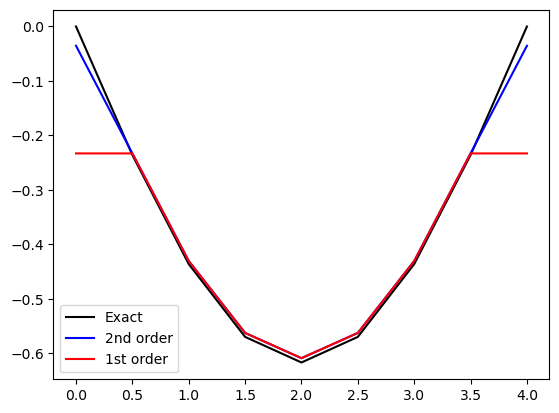

In [10]:
f = np.sin(np.pi*t / T)
d2fe = -(np.pi/T)**2*f
d2f = D2 @ f
d2f1 = D2e @ f
plt.plot(t, d2fe, 'k', t, d2f, 'b', t, d2f1, 'r')
plt.legend(['Exact', '2nd order', '1st order'])

# First derivative

Let us create a similar matrix for a first order derivative. We use a central stencil for $n=1, 2, \ldots N-1$ and skewed stencils for the first and last rows. Again, we need the following Taylor expansions for row 0

\begin{align}
(-1)\quad u^{n-1} &= u^n - h u' + \frac{h^2}{2}u'' - \frac{h^3}{6}u''' + \frac{h^4}{24}u'''' + \cdots \\
(1)\quad u^{n+1} &= u^n + h u' + \frac{h^2}{2}u'' + \frac{h^3}{6}u''' + \frac{h^4}{24}u'''' + \cdots \\
(2)\quad u^{n+2} &= u^n + 2h u' + \frac{2 h^2}{1}u'' + \frac{4 h^3}{3}u''' + \frac{2 h^4}{3}u'''' + \cdots 
\end{align}

(1) - (-1) leads to

$$
u'(t_n) = \frac{u^{n+1}-u^{n-1}}{2 h} + \frac{h^2}{6} u''' +
$$

We get a first order approximation for $u'$ using merely Eq. (1):

$$
u'(t_n) = \frac{u^{n+1}-u^n}{h} - \frac{h}{2}u'' - 
$$

Adding one more equation (Eq. (2)) we get second order: (2)-4(1)

$$
u'(t_n) = \frac{-u^{n+2}+4u^{n+1}-3u^n}{2h} + \frac{h^2}{3}u''' +
$$

Hence a second order accurate first differentiation matrix is

$$
D^{(1)} = \frac{1}{2 h}\begin{bmatrix}
-3 & 4 & -1 & 0  & 0 & 0 & 0 & 0  \\
-1 & 0 & 1 & 0 & 0 & 0 & 0 & \cdots \\
0 & -1 & 0 & 1 & 0 & 0 & 0 & \cdots \\
\vdots & & & \ddots &  & & &\cdots \\
\vdots & 0 & 0 & 0 &  -1& 0& 1& 0 \\
\vdots & 0 & 0& 0& 0& -1& 0& 1 \\
0 & 0 & 0 & 0  & 0 & 1 & -4 & 3 \\
\end{bmatrix}
$$


In [11]:
D1 = sparse.diags([-np.ones(N), np.ones(N)], np.array([-1, 1]), (N+1, N+1), 'lil')
D1[0, :3] = -3, 4, -1
D1[-1, -3:] = 1, -4, 3
D1 *= (1/(2*dt))
D1.toarray()*(2*dt)

array([[-3.,  4., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  3.]])

In [12]:
f = t
D1 @ f

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

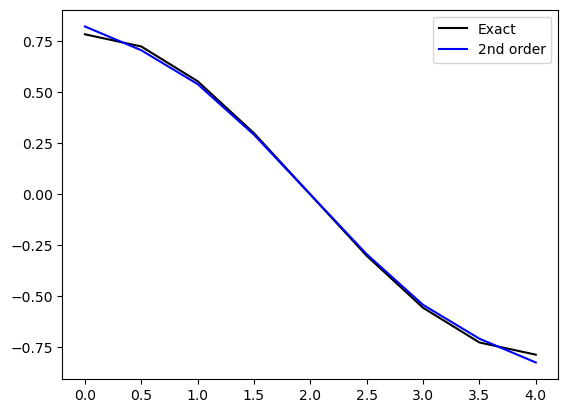

In [13]:
f = np.sin(np.pi*t / T)
d1fe = (np.pi/T)*np.cos(np.pi*t/T)
d1f = D1 @ f
plt.plot(t, d1fe, 'k', t, d1f, 'b')
plt.legend(['Exact', '2nd order'])

In [14]:
D2n = D1 @ D1
D2n.toarray()*dt**2

array([[ 1.25, -2.75,  1.75, -0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.75, -1.25,  0.25,  0.25,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.  , -0.5 ,  0.  ,  0.25],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.25,  0.25, -1.25,  0.75],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  , -0.25,  1.75, -2.75,  1.25]])

In [15]:
f = np.sin(np.pi*t / T)
d2fe = -(np.pi/T)**2*f
e2 = D2 @ f - d2fe
en = D2n @ f - d2fe
np.sqrt(dt*np.linalg.norm(e2)), np.sqrt(dt*np.linalg.norm(en))

(0.16216463185914665, 0.37045090252771984)

It can be shown that the matrix that is D2n =$D^{(1)} D^{(1)}$ (matrix product of $D^{(1)}$ with itself) is only first order accurate.

# Solve equations using FD matrices

The FD matrices are great because they depend only on $h$ and may be implemented once and reused. They only need to be modified in accordance with boundary conditions.

Let's do the decay equation first and assemble the system

$$
A \boldsymbol{u} = \boldsymbol{b}
$$

for the equation

$$
u' + au = 0, u(0)=I, t \in [0, T] 
$$

Before boundary conditions we can assemble this as 

$$
(D^{(1)} + a \mathbb{I})\boldsymbol{u} = \boldsymbol{b}
$$

where $\mathbb{I}$ is the identity matrix and the only non-zero item in $\boldsymbol{b}$ is the boundary condition for $n=0$. This corresponds to

$$
\frac{u^{n+1}-u^{n-1}}{2 h} + a u^n = 0
$$


In [16]:
D1 = sparse.diags([-np.ones(N), np.ones(N)], np.array([-1, 1]), (N+1, N+1), 'lil')
D1[0, :3] = -3, 4, -1
D1[-1, -3:] = 1, -4, 3
D1 *= (1/(2*dt))
Id = sparse.eye(N+1)
A = D1 + a*Id
b = np.zeros(N+1)
b[0] = I
A[0, :3] = 1, 0, 0 # boundary condition
A.toarray()

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1., -4.,  5.]])

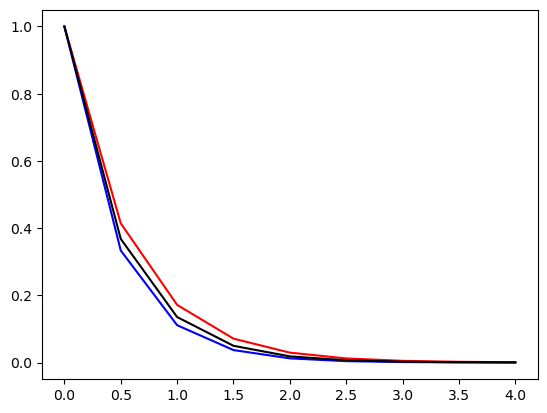

In [17]:
u1 = sparse.linalg.spsolve(A, b)
plt.plot(t, u1, 'r', t, u, 'b', t, np.exp(-a*t), 'k')

The sceme is not fully implicit in the source term. However, it is using three neighbouring points for every equation, which is more stable than using merely two.

# Generic finite difference stencils

It is possible to derive finite difference stencils of any order from the Taylor expansions around a point in both positive and negative directions. The generic Taylor expansion around $x=x_0$ reads

$$
u(x) = \sum_{i=0}^{N} \frac{(x-x_0)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(x^{N+1})
$$

where $u^{(i)}(x_0) = \frac{d^{i}u}{dx^{i}}|_{x=x_0}$.

With the finite difference method we only evaluate this expansion for certain points around $x_0$. That is, we use only $x=x_0+mh$, where $m$ is an integer and $h$ is a constant (time step or mesh size). We get

$$
u(x_0+mh) = \sum_{i=0}^{N} \frac{(mh)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(h^{N+1})
$$

where we usually use the finite difference notation $u^{n+m} = u(x_0+mh)$.

We can set up a system of equations for $m=-2, -1, 0, 1, 2$

\begin{align}
u^{n-2} &= \sum_{i=0}^{N} \frac{(-2h)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(h^{N+1}) \\
u^{n-1} &= \sum_{i=0}^{N} \frac{(-h)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(h^{N+1}) \\
u^{n} &= u^{n} \\
u^{n+1} &= \sum_{i=0}^{N} \frac{(h)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(h^{N+1}) \\
u^{n+2} &= \sum_{i=0}^{N} \frac{(2h)^i}{i!} u^{(i)}(x_0) + \mathcal{O}(h^{N+1}) \\
\end{align}

If we now simply remove all $\mathcal{O}(h^{N+1})$ terms and use $N=4$, these equations can be written on matrix form as

$$
\begin{bmatrix}
u^{n-2}\\
u^{n-1}\\
u^{n}\\
u^{n+1}\\
u^{n+2}\\
\end{bmatrix}
= \begin{bmatrix}
\frac{(-2h)^0}{0!} & \frac{(-2h)^1}{1!} & \frac{(-2h)^2}{2!} & \frac{(-2h)^3}{3!} & \frac{(-2h)^4}{4!}  \\
\frac{(-h)^0}{0!} & \frac{(-h)^1}{1!} & \frac{(-h)^2}{2!} & \frac{(-h)^3}{3!} & \frac{(-h)^4}{4!} \\
1 & 0 & 0 & 0 & 0 \\
\frac{(h)^0}{0!} & \frac{(h)^1}{1!} & \frac{(h)^2}{2!} & \frac{(h)^3}{3!} & \frac{(h)^4}{4!} \\
\frac{(2h)^0}{0!} & \frac{(2h)^1}{1!} & \frac{(2h)^2}{2!} & \frac{(2h)^3}{3!} & \frac{(2h)^4}{4!} \\
\end{bmatrix}
\begin{bmatrix}
u^{(0)}(x_0) \\
u^{(1)}(x_0) \\
u^{(2)}(x_0) \\
u^{(3)}(x_0) \\
u^{(4)}(x_0)
\end{bmatrix}
$$

or more easily as

$$
\boldsymbol{u} = C \boldsymbol{u_x}
$$

where $\boldsymbol{u_x} = \{u^{(i)}(x_0)\}_{i=0}^{N}$.

Remember that the derivatives $u^{(i)}(x_0)$ are what we're normally interested in. For example, for a second order accurate scheme (with $m=-1, 0, 1$) we have

$$
u^{(2)}(x_0) = \frac{u^{n+1}-2u^n+u^{n-1}}{h^2}
$$

By assembling the matrix $C$ we can compute any finite difference scheme!

$$
\boldsymbol{u}_x = C^{-1} \boldsymbol{u}
$$

Let's do this for $m=(-1, 0, 1)$ using $N=2$

$$
C = \begin{bmatrix}
1 & -h & \frac{h^2}{2} \\
1 & 0 & 0 \\
1 & h & \frac{h^2}{2}
\end{bmatrix}
$$


In [18]:
import sympy as sp
x, h = sp.symbols('x,h')
C = sp.Matrix([[1, -h, h**2/2], [1, 0, 0], [1, h, h**2/2]])
C

Matrix([
[1, -h, h**2/2],
[1,  0,      0],
[1,  h, h**2/2]])

In [19]:
C.inv()

Matrix([
[       0,       1,       0],
[-1/(2*h),       0, 1/(2*h)],
[ h**(-2), -2/h**2, h**(-2)]])

The second order central schemes are found in the last two rows. Row 1 is the first derivative, row 2 the second derivative.

In [20]:
f = sp.Function('f')
coef = sp.Matrix([f(x-h), f(x), f(x+h)])
(C.inv())[2, :] @ coef

Matrix([[-2*f(x)/h**2 + f(-h + x)/h**2 + f(h + x)/h**2]])

We can get any finite difference scheme using all the points that we like. For example, to create a forward difference of the second derivative using inly $u^n, u^{n+1}$ and $u^{n+2}$ we can use

$$
C = \begin{bmatrix}
1 & 0 & 0 \\
1 & h & \frac{h^2}{2} \\
1 & 2h & {2 h^2}
\end{bmatrix}
$$


In [22]:
C = sp.Matrix([[1, 0, 0], [1, h, h**2/2], [1, 2*h, 2*h**2]])
coef = sp.Matrix([f(x), f(x+h), f(x+2*h)])
(C.inv())[2, :] @ coef

Matrix([[f(x)/h**2 - 2*f(h + x)/h**2 + f(2*h + x)/h**2]])

However, this scheme will only be first order accurate, because it is not central. A second order scheme needs to use one more point

In [76]:
x0=sp.Symbol('x0')
fm1 = f(x0-h).series(h, 0)
f0 = f(x0).series()
fp1 = f(x0+h).series(h, 0)

In [77]:
(fp1-2*fm1)

2*h*Subs(Derivative(f(_xi_1), _xi_1), _xi_1, x0) + h**3*Subs(Derivative(f(_xi_1), (_xi_1, 3)), _xi_1, x0)/3 + h**5*Subs(Derivative(f(_xi_1), (_xi_1, 5)), _xi_1, x0)/60 + O(h**6)

In [23]:
C = sp.Matrix([[1, 0, 0, 0], [1, h, h**2/2, h**3/3], [1, 2*h, 2*h**2, 4*h**3/3], [1, 3*h, 9*h**2/2, 27*h**3/6]])
coef = sp.Matrix([f(x), f(x+h), f(x+2*h), f(x+3*h)])
(C.inv())[2, :] @ coef

Matrix([[13*f(x)/(9*h**2) - 10*f(h + x)/(3*h**2) + 7*f(2*h + x)/(3*h**2) - 4*f(3*h + x)/(9*h**2)]])